In [1]:
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalizing the pixel values 
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert labels to categorical (one-hot encoding)
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000, 10)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 10)


In [2]:
from sklearn.model_selection import train_test_split

validation_split = 0.2 

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=validation_split, random_state=42
)

print("New Train images shape:", train_images.shape)
print("New Train labels shape:", train_labels.shape)
print("Validation images shape:", val_images.shape)
print("Validation labels shape:", val_labels.shape)

New Train images shape: (40000, 32, 32, 3)
New Train labels shape: (40000, 10)
Validation images shape: (10000, 32, 32, 3)
Validation labels shape: (10000, 10)


In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def cnn_model(input_shape=(32, 32, 3), num_classes=10):
    model = models.Sequential()

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu',
                            kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu',
                            kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu',
                            kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.5))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

model = cnn_model()
model.summary()

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 3,253,834 (12.41 MB)

 Trainable params: 3,251,018 (12.40 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [4]:
early_stopping = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-6)

history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=64),
    epochs=50,
    validation_data=(val_images, val_labels),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.2363 - loss: 4.4113 - val_accuracy: 0.3157 - val_loss: 3.5682 - learning_rate: 1.0000e-04
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.3633 - loss: 3.5735 - val_accuracy: 0.4511 - val_loss: 3.1736 - learning_rate: 1.0000e-04
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.4210 - loss: 3.2755 - val_accuracy: 0.3753 - val_loss: 3.5449 - learning_rate: 1.0000e-04
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.4799 - loss: 3.0428 - val_accuracy: 0.4493 - val_loss: 3.1488 - learning_rate: 1.0000e-04
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.5075 - loss: 2.8726 - val_accuracy: 0.4974 - val_loss: 2.9573 - learning_rate: 1.0000e-04
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.5412 - loss: 2.7147 - val_accuracy: 0.5391 - val_loss: 2.8081 - learning_rate: 1.0000e-04
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accurac

In [5]:
# Evaluating the model 
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

313/313 - 1s - 3ms/step - accuracy: 0.8739 - loss: 0.6944
Test accuracy: 0.8739
Test loss: 0.6944


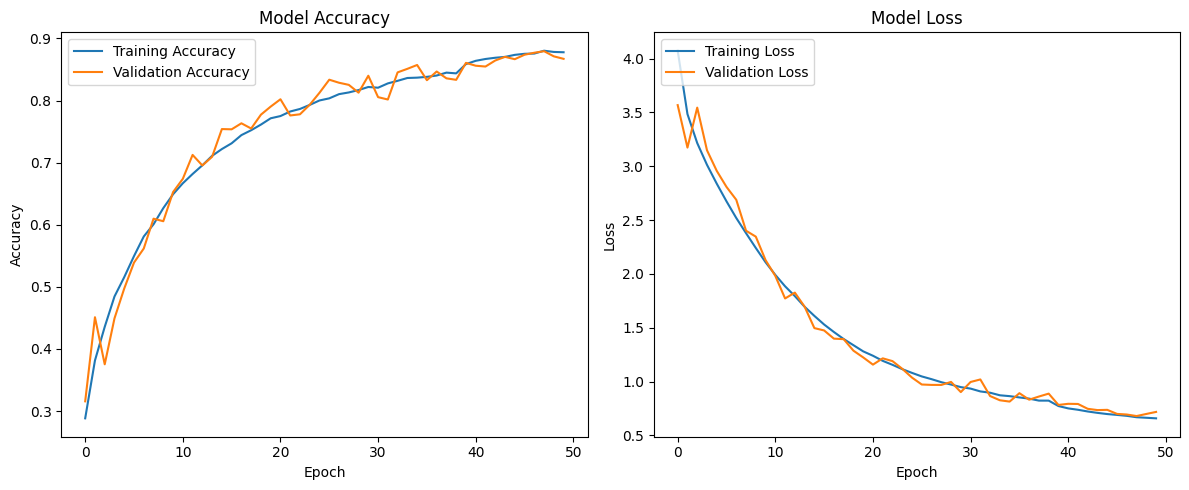

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [7]:
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout
from keras.applications import ResNet50
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

from keras.applications import ResNet50
from keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D
from keras import layers
from keras import models, regularizers
from keras.initializers import he_normal

# ResNet18 implementation
inputs = Input(shape=(32, 32, 3))

x = Conv2D(64, (3, 3), strides=(1, 1), padding='same', kernel_initializer=he_normal(), kernel_regularizer=regularizers.l2(0.0005))(inputs)
x = BatchNormalization()(x)
x = Activation('relu')(x)

for _ in range(2):
    shortcut = x
    x = Conv2D(64, (3, 3), padding='same', kernel_initializer=he_normal(), kernel_regularizer=regularizers.l2(0.0005))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(64, (3, 3), padding='same', kernel_initializer=he_normal(), kernel_regularizer=regularizers.l2(0.0005))(x)
    x = BatchNormalization()(x)
    x = layers.add([x, shortcut])
    x = Activation('relu')(x)
    x = Dropout(0.5)(x) 

# Second Residual Block
for filters in [128, 256, 512]:
    shortcut = Conv2D(filters, (1, 1), strides=(2, 2), padding='same', kernel_initializer=he_normal(), kernel_regularizer=regularizers.l2(0.0005))(x)
    shortcut = BatchNormalization()(shortcut)
    x = Conv2D(filters, (3, 3), strides=(2, 2), padding='same', kernel_initializer=he_normal(), kernel_regularizer=regularizers.l2(0.0005))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(filters, (3, 3), padding='same', kernel_initializer=he_normal(), kernel_regularizer=regularizers.l2(0.0005))(x)
    x = BatchNormalization()(x)
    x = layers.add([x, shortcut])
    x = Activation('relu')(x)
    x = Dropout(0.5)(x)  

x = GlobalAveragePooling2D()(x)
x = Dense(10, activation='softmax', kernel_initializer=he_normal(), kernel_regularizer=regularizers.l2(0.0005))(x)

model = Model(inputs=inputs, outputs=x)

model.summary()

from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * 0.1

lr_scheduler = LearningRateScheduler(scheduler)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    horizontal_flip=True
)
datagen.fit(train_images)

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 32, 32, 64)     │          1,792 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 32, 32, 64)     │            256 │ conv2d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 32, 32, 64)     │              0 │ batch_normalization_7… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 64)     │         36,928 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 32, 32, 64)     │            256 │ conv2d_7[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 32, 32, 64)     │              0 │ batch_normalization_8… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 32, 32, 64)     │         36,928 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 32, 32, 64)     │            256 │ conv2d_8[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 32, 32, 64)     │              0 │ batch_normalization_9… │
│                           │                        │                │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 32, 32, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 32, 32, 64)     │              0 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 32, 32, 64)     │         36,928 │ dropout_4[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 32, 32, 64)     │            256 │ conv2d_9[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 32, 32, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 32, 32, 64)     │         36,928 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1

 Total params: 4,986,250 (19.02 MB)

 Trainable params: 4,980,234 (19.00 MB)

 Non-trainable params: 6,016 (23.50 KB)

In [8]:
history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=128),
    epochs=50,
    validation_data=(test_images, test_labels),
    callbacks=[lr_scheduler, early_stopping]
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 73s 131ms/step - accuracy: 0.2188 - loss: 5.0949 - val_accuracy: 0.1111 - val_loss: 7.3474 - learning_rate: 1.0000e-04
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/step - accuracy: 0.3695 - loss: 4.4798 - val_accuracy: 0.1485 - val_loss: 6.1189 - learning_rate: 1.0000e-04
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 90ms/step - accuracy: 0.4213 - loss: 4.1588 - val_accuracy: 0.2477 - val_loss: 4.8780 - learning_rate: 1.0000e-04
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 90ms/step - accuracy: 0.4510 - loss: 3.8974 - val_accuracy: 0.2986 - val_loss: 4.4808 - learning_rate: 1.0000e-04
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.4810 - loss: 3.6593 - val_accuracy: 0.3143 - val_loss: 4.2893 - learning_rate: 1.0000e-04
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.5106 - loss: 3.4326 - val_accuracy: 0.3547 - val_loss: 4.0526 - learning_rate: 1.0000e-04
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 35s 89ms/st

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8553 - loss: 0.4888
Test accuracy: 0.8549
Test Loss: 0.4954


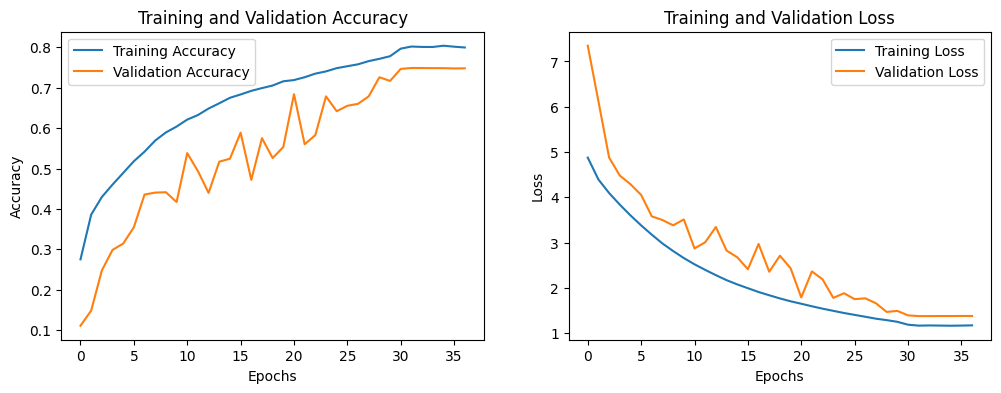

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

def alexnet_model(input_shape=(32, 32, 3), num_classes=10):
    inputs = Input(shape=input_shape)

    x = Conv2D(96, (3, 3), strides=1, padding='same', activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), strides=2)(x)
    
    x = Conv2D(256, (3, 3), strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), strides=2)(x)

    x = Conv2D(384, (3, 3), strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    x = Conv2D(384, (3, 3), strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)

    x = Conv2D(256, (3, 3), strides=1, padding='same', activation='relu')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), strides=2)(x)

    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.3)(x)  
    x = Dense(4096, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=x)
    return model

model = alexnet_model()

model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 32, 32, 96)          │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 32, 32, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 16, 16, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 16, 16, 256)         │         221,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 16, 16, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 8, 8, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 8, 8, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 8, 8, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 8, 8, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 8, 8, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 4096)                │              

 Total params: 36,930,826 (140.88 MB)

 Trainable params: 36,928,074 (140.87 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler

def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.5  

lr_scheduler = LearningRateScheduler(scheduler)

datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

history = model.fit(
    datagen.flow(train_images, train_labels, batch_size=128),
    validation_data=(test_images, test_labels),
    epochs=50,
    steps_per_epoch=len(train_images) // 128
)

Epoch 1/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 51s 99ms/step - accuracy: 0.2921 - loss: 2.0929 - val_accuracy: 0.1853 - val_loss: 2.4892
Epoch 2/50
  1/390 ━━━━━━━━━━━━━━━━━━━━ 16s 41ms/step - accuracy: 0.4453 - loss: 1.4422

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4453 - loss: 1.4422 - val_accuracy: 0.1842 - val_loss: 2.4841
Epoch 3/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.4616 - loss: 1.5064 - val_accuracy: 0.5584 - val_loss: 1.2292
Epoch 4/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5703 - loss: 1.3220 - val_accuracy: 0.5597 - val_loss: 1.2292
Epoch 5/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.5162 - loss: 1.3438 - val_accuracy: 0.5885 - val_loss: 1.1624
Epoch 6/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5000 - loss: 1.3026 - val_accuracy: 0.5882 - val_loss: 1.1634
Epoch 7/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.5546 - loss: 1.2433 - val_accuracy: 0.6156 - val_loss: 1.0840
Epoch 8/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6016 - loss: 1.1205 - val_accuracy: 0.6177 - val_loss: 1.0814
Epoch 9/50
390/390 ━━━━━━━━━━━━━━━━━━━━ 30s 76ms/step - accuracy: 0.5804 - loss: 1.1714 - val_accuracy: 0.632

In [14]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


313/313 - 1s - 4ms/step - accuracy: 0.7588 - loss: 0.7053
Test Loss: 0.7052782773971558
Test Accuracy: 0.7588000297546387


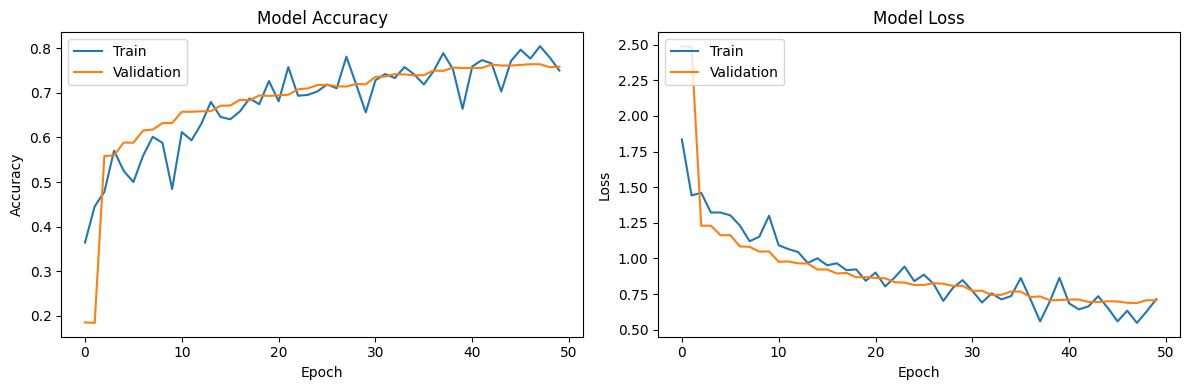

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [16]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Load the MobileNet model 
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in base_model.layers[-10:]:  
    layer.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  
x = Dropout(0.5)(x)  
predictions = Dense(10, activation='softmax')(x)  

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(train_images)

model.summary()

<ipython-input-16-5c1fd66bc3d6>:12: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 16, 16, 32)          │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 16, 16, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 16, 16, 32)          │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 16, 16, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 16, 16, 64)          │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 16, 16, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 8, 8, 64)            │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 8, 8, 64)            │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 8, 8, 128)           │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 8, 8, 128)           │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 8, 8, 128)           │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 8, 8, 128)           │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 8, 8, 128)           │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,288,714 (16.36 MB)

 Trainable params: 4,266,826 (16.28 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [17]:
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    validation_data=(val_images, val_labels),
                    epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 59ms/step - accuracy: 0.3001 - loss: 2.3915 - val_accuracy: 0.5980 - val_loss: 1.1444
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.5530 - loss: 1.2906 - val_accuracy: 0.6685 - val_loss: 0.9362
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.6280 - loss: 1.0738 - val_accuracy: 0.7026 - val_loss: 0.8316
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 45ms/step - accuracy: 0.6696 - loss: 0.9537 - val_accuracy: 0.7366 - val_loss: 0.7511
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.6995 - loss: 0.8668 - val_accuracy: 0.7597 - val_loss: 0.6742
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.7236 - loss: 0.8104 - val_accuracy: 0.7649 - val_loss: 0.6638
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.7390 - loss: 0.7550 - val_accuracy: 0.7907 - val_loss: 0.5947
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.7534 - loss: 0.7199 - val_accurac

In [18]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

313/313 - 1s - 4ms/step - accuracy: 0.8549 - loss: 0.4954
Test Accuracy: 0.8549000024795532
Test Loss: 0.4954289197921753


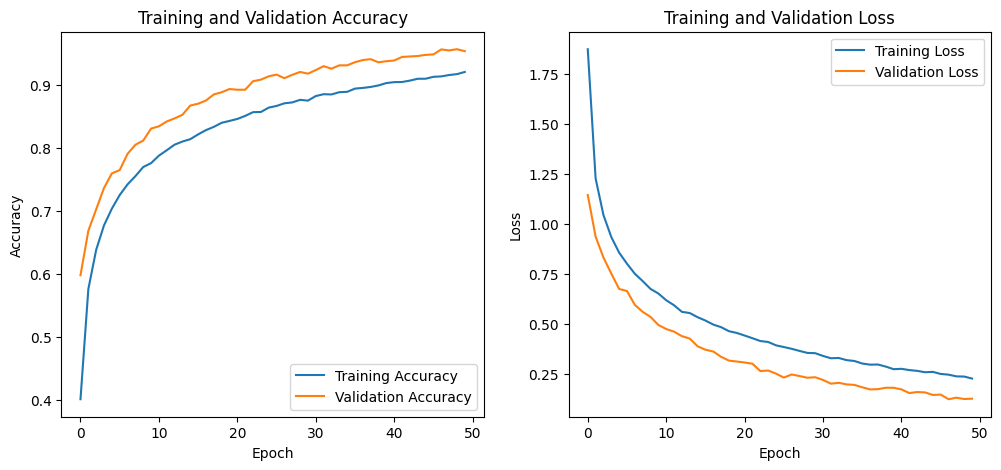

In [19]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

plot_training_history(history)

Model Comparison Table:
              Model  Test Accuracy  Test Loss
0         CNN Model           0.87       0.69
1    ResNet50 Model           0.85       0.49
2  Modified AlexNet           0.76       0.71
3         MobileNet           0.85       0.49

Best Model Based on Test Accuracy:
Model            CNN Model
Test Accuracy         0.87
Test Loss             0.69
Name: 0, dtype: object


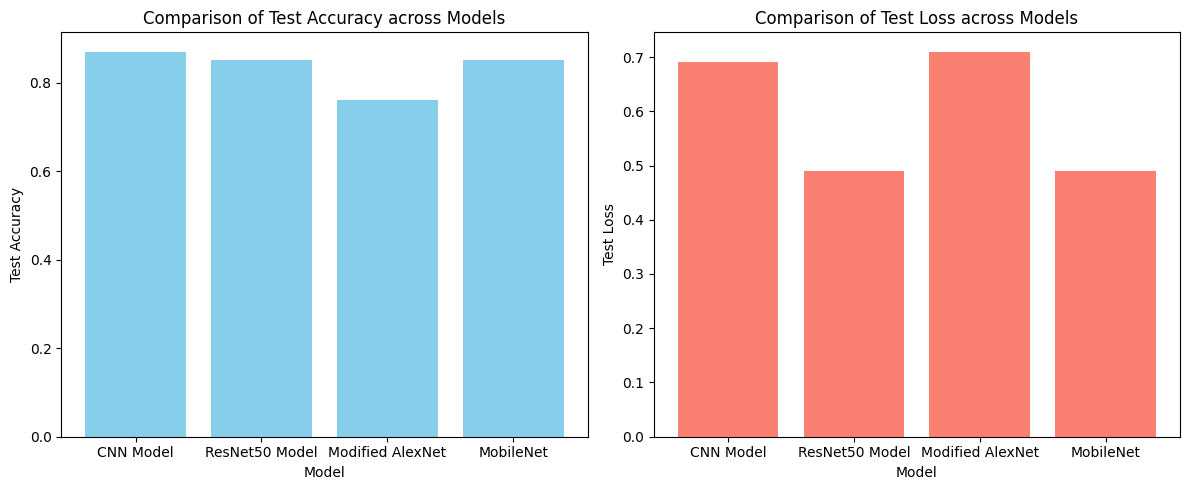

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

model_results = {
    "Model": ["CNN Model", "ResNet50 Model", "Modified AlexNet", "MobileNet"],
    "Test Accuracy": [0.87, 0.85, 0.76, 0.85],  
    "Test Loss": [0.69, 0.49, 0.71, 0.49]  
}

results_df = pd.DataFrame(model_results)

print("Model Comparison Table:")
print(results_df)

best_model = results_df.loc[results_df['Test Accuracy'].idxmax()]

print("\nBest Model Based on Test Accuracy:")
print(best_model)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(results_df["Model"], results_df["Test Accuracy"], color="skyblue")
plt.xlabel("Model")
plt.ylabel("Test Accuracy")
plt.title("Comparison of Test Accuracy across Models")

plt.subplot(1, 2, 2)
plt.bar(results_df["Model"], results_df["Test Loss"], color="salmon")
plt.xlabel("Model")
plt.ylabel("Test Loss")
plt.title("Comparison of Test Loss across Models")

plt.tight_layout()
plt.show()
